# Testing a Sentiment in Covid-twitter data

In [1]:
!pip install openpyxl

In [2]:
! pip install xlrd

In [3]:
import pandas as pd

In [108]:
import pandas as pd

file_path = 'Corona_NLP_test.csv.xls'

try:
    # Attempt to read as Excel file
    df = pd.read_excel(file_path)
    print("Loaded file as an Excel file")
except Exception as e:
    print(f"Failed to load as Excel: {e}")
    try:
        # Attempt to read as CSV file
        df = pd.read_csv(file_path)
        print("Loaded file as a CSV file")
    except Exception as e:
        print(f"Failed to load as CSV: {e}")
        df = None

# If successful, display the first few rows
if df is not None:
    print(df.head())


Failed to load as Excel: Excel file format cannot be determined, you must specify an engine manually.
Loaded file as a CSV file
   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral  


In [5]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [6]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
3797,3798,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,Extremely Positive


In [7]:
df['Sentiment'].unique()

array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

In [8]:
df['Sentiment'].value_counts()

Sentiment
Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: count, dtype: int64

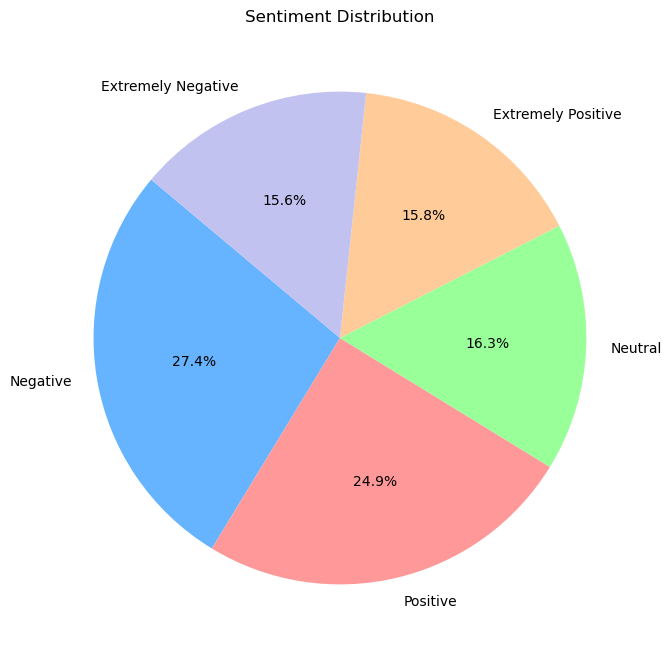

In [9]:
import matplotlib.pyplot as plt


# Count the number of occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999','#99ff99','#ffcc99','#c2c2f0'])

# Add a title
plt.title('Sentiment Distribution')

# Show the plot
plt.show()


### train test split

In [120]:
import random
from sklearn.model_selection import train_test_split

# Separate tweets by sentiment
extremely_negative_tweets = list(df[df['Sentiment'] == 'Extremely Negative']['OriginalTweet'].astype(str))
negative_tweets = list(df[df['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))
neutral_tweets = list(df[df['Sentiment'] == 'Neutral']['OriginalTweet'].astype(str))
positive_tweets = list(df[df['Sentiment'] == 'Positive']['OriginalTweet'].astype(str))
extremely_positive_tweets = list(df[df['Sentiment'] == 'Extremely Positive']['OriginalTweet'].astype(str))

'''
# Make lists equal in length (if needed)
max_len = min(len(extremely_negative_tweets), len(negative_tweets), len(neutral_tweets), len(positive_tweets), len(extremely_positive_tweets))

extremely_negative_tweets = extremely_negative_tweets[:max_len]
negative_tweets = negative_tweets[:max_len]
neutral_tweets = neutral_tweets[:max_len]
positive_tweets = positive_tweets[:max_len]
extremely_positive_tweets = extremely_positive_tweets[:max_len]

# Combine all tweets into one dataset
all_train_tweets = (extremely_negative_tweets +
                    negative_tweets +
                    neutral_tweets +
                    positive_tweets +
                    extremely_positive_tweets)

 '''                   

# Splitting into training and testing sets (80/20 split)
ext_neg_train, ext_neg_test = train_test_split(extremely_negative_tweets, test_size=0.2, random_state=42)
neg_train, neg_test = train_test_split(negative_tweets, test_size=0.2, random_state=42)
neutral_train, neutral_test = train_test_split(neutral_tweets, test_size=0.2, random_state=42)
pos_train, pos_test = train_test_split(positive_tweets, test_size=0.2, random_state=42)
ext_pos_train, ext_pos_test = train_test_split(extremely_positive_tweets, test_size=0.2, random_state=42)

# Print sizes of the training and testing datasets
print(f"Size of training dataset: {len(ext_neg_train) + len(neg_train) + len(neutral_train) + len(pos_train) + len(ext_pos_train)}")
print(f"Size of testing dataset: {len(ext_neg_test) + len(neg_test) + len(neutral_test) + len(pos_test) + len(ext_pos_test)}")

# Randomly print a tweet from each category with color formatting
print('\033[91m' + "Extremely Negative example: " + ext_neg_train[random.randint(0, len(ext_neg_train) - 1)] + '\033[0m'"\n")

print('\033[91m' + "Negative example: " + neg_train[random.randint(0, len(neg_train) - 1)] + '\033[0m'"\n")

print('\033[93m' + "Neutral example: " + neutral_train[random.randint(0, len(neutral_train) - 1)] + '\033[0m'"\n")

print('\033[92m' + "Positive example: " + pos_train[random.randint(0, len(pos_train) - 1)] + '\033[0m'"\n")

print('\033[92m' + "Extremely Positive example: " + ext_pos_train[random.randint(0, len(ext_pos_train) - 1)] + '\033[0m')


Size of training dataset: 3036
Size of testing dataset: 762
Extremely Negative example: We're at a critical time for the containment of COVID-19.

As a necessary precaution, The Stop will be shifting our resources away from community programming and towards emergency food access services starting Monday, March 16.  https://t.co/rM191zyAfX

Negative example: Supermarket Armageddon. Seriously, guys you need to calm the fuck down #Covid_19 #coronavirusireland

Neutral example: #ITV #Vera opening scene a supermarket full of goods.....How long before we see that again? #Covid_19

Positive example: @Disney What would it take for my family to pay movie ticket prices and watch this at home to avoid the #Covid_19 ? Happy to pay the $$$s.

Extremely Positive example: Thank your healthcare workers,EMS, firefighters, police, janitors, grocery store staff every chance you can. While you can work from home with your hoards of toilet paper, masks, &amp;Clorox wipes they cannot. Theyre going to be t

### Text Preprocessing

In [17]:
import nltk

# Download the stopwords corpus
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ashutoshraghuwanshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer

def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    
    # Remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    
    # Remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # Remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    
    # Remove hashtags (only the hash sign #)
    tweet = re.sub(r'#', '', tweet)
    
    # Tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    
    tweets_clean = []
    for word in tweet_tokens:
        if word not in stopwords_english and word not in string.punctuation:
            # Stem the word
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
    
    return tweets_clean


In [21]:
# Assuming all_positive_tweets is a list of tweets labeled as positive
tweet = extremely_negative_tweets[12]

# Print the original tweet in green
print('\033[92m')  # Green text color
print("Original tweet:")
print(tweet)

# Preprocess the tweet
tweets_stem = process_tweet(tweet)

# Print the preprocessed tweet in blue
print('\033[94m')  # Blue text color
print("Preprocessed tweet:")
print(tweets_stem)

# Reset the terminal color to default
print('\033[0m')



Original tweet:
@7NewsSydney @ScottMorrisonMP Some Factors have bought on the recession 1)Ignoring per-capita recession, 2)wage growth stagnant 3)Consumer debt levels are through the roof 4) casualized work! These changes in the economy are driven by government not #co

Preprocessed tweet:
['factor', 'bought', 'recess', '1', 'ignor', 'per-capita', 'recess', '\x92', '2', 'wage', 'growth', 'stagnant', '3', 'consum', 'debt', 'level', 'roof', '4', 'casual', 'work', 'chang', 'economi', 'driven', 'govern', 'co']



In [23]:
import numpy as np
from collections import defaultdict

def build_freqs(tweets, ys):
    """
    Build a frequency dictionary for each (word, sentiment) pair.
    
    Args:
    tweets -- a list of tweets
    ys -- an m x 1 array with the sentiment label of each tweet (either 0 or 1)
    
    Returns:
    freqs -- a dictionary mapping each (word, sentiment) pair (key) to its frequency (value)
    """
    
    # Convert np array to list
    yslist = np.squeeze(ys).tolist()
    
    # Initialize an empty dictionary
    freqs = defaultdict(int)
    
    # Loop over each tweet and its corresponding sentiment
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            freqs[pair] += 1
    
    return freqs


In [25]:
import numpy as np

# Combine all the training tweets
training_tweets = ext_neg_train + neg_train + neutral_train + pos_train + ext_pos_train

# Create labels for each sentiment category
labels = np.concatenate((
    np.full(len(ext_neg_train), 0),  # Label 0 for 'Extremely Negative'
    np.full(len(neg_train), 1),      # Label 1 for 'Negative'
    np.full(len(neutral_train), 2),  # Label 2 for 'Neutral'
    np.full(len(pos_train), 3),      # Label 3 for 'Positive'
    np.full(len(ext_pos_train), 4)   # Label 4 for 'Extremely Positive'
))

# Optional: Convert labels to a specific dtype if needed (e.g., integer)
labels = labels.astype(int)

# Checking the shapes to ensure correctness
print(f"Number of training tweets: {len(training_tweets)}")
print(f"Shape of labels array: {labels.shape}")


Number of training tweets: 3036
Shape of labels array: (3036,)


In [27]:
# Assuming you have defined `all_train_tweets` and `labels` as shown earlier
# Now build the frequency dictionary
freqs = build_freqs(training_tweets, labels)

# Check the data type of `freqs`
print(f'type(freqs) = {type(freqs)}')

# Check the length of the frequency dictionary
print(f'len(freqs) = {len(freqs)}')


type(freqs) = <class 'collections.defaultdict'>
len(freqs) = 14847


In [122]:
#### example by taking random words

In [124]:
# Selected words to appear in the report
keys = ['void', 'commun', 'spirit', 'stop', 'merri', 'nice', 
        'good', 'bad', 'sad', 'mad', 'best', 'pretti', 
        'song', 'idea', 'power', 'play']

# List representing our table of word counts
data = []

# Loop through our selected words
for word in keys:
    # Initialize counts for each sentiment category
    counts = [0] * 5  # [Extremely Negative, Negative, Neutral, Positive, Extremely Positive]
    
    # Retrieve counts for each sentiment
    for sentiment in range(5):  # 0 to 4 representing the sentiments
        if (word, sentiment) in freqs:
            counts[sentiment] = freqs[(word, sentiment)]
    
    # Append the results to the data list
    data.append([word] + counts)

# Print the report
print("Word Count Report:")
print(f"{'Word':<20}{'Extremely Negative':<20}{'Negative':<10}{'Neutral':<10}{'Positive':<10}{'Extremely Positive':<20}")
for entry in data:
    print(f"{entry[0]:<20}{entry[1]:<20}{entry[2]:<10}{entry[3]:<10}{entry[4]:<10}{entry[5]:<20}")


Word Count Report:
Word                Extremely Negative  Negative  Neutral   Positive  Extremely Positive  
void                0                   0         0         1         0                   
commun              7                   11        0         15        13                  
spirit              0                   1         0         1         4                   
stop                52                  28        2         14        7                   
merri               0                   0         0         0         0                   
nice                2                   5         0         6         9                   
good                9                   28        11        49        44                  
bad                 18                  9         0         1         3                   
sad                 6                   4         0         0         0                   
mad                 9                   8         2         2         4

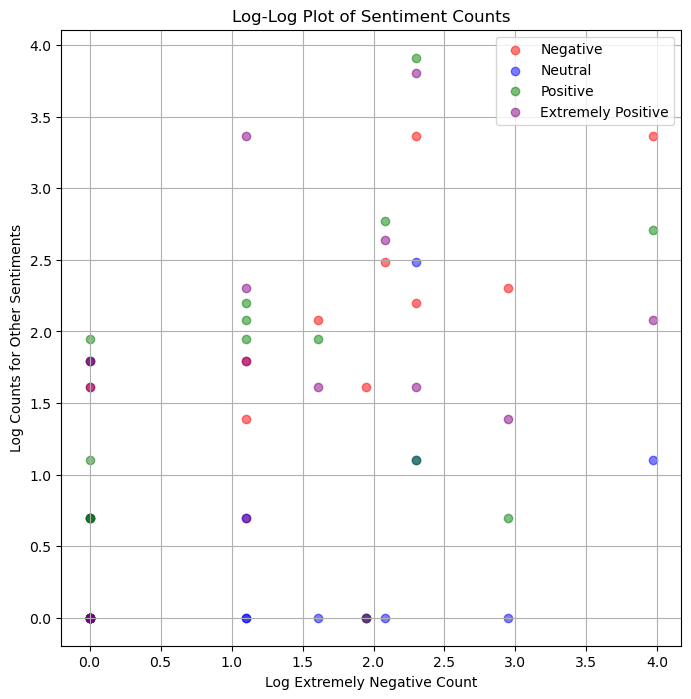

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data structure for 'data', assuming counts are already populated
# Each entry in data should be like: ['word', ext_neg_count, neg_count, neutral_count, pos_count, ext_pos_count]
# For example: data = [['word1', ext_neg, neg, neutral, pos, ext_pos], ...]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8,8))

# Prepare data for scatter plots
# Use logarithmic scale for counts
x = np.log([entry[1] + 1 for entry in data])  # Extremely Negative counts
y1 = np.log([entry[2] + 1 for entry in data])  # Negative counts
y2 = np.log([entry[3] + 1 for entry in data])  # Neutral counts
y3 = np.log([entry[4] + 1 for entry in data])  # Positive counts
y4 = np.log([entry[5] + 1 for entry in data])  # Extremely Positive counts

# Plot each sentiment category with a different color
ax.scatter(x, y1, label='Negative', color='red', alpha=0.5)
ax.scatter(x, y2, label='Neutral', color='blue', alpha=0.5)
ax.scatter(x, y3, label='Positive', color='green', alpha=0.5)
ax.scatter(x, y4, label='Extremely Positive', color='purple', alpha=0.5)

# Assign axis labels
plt.xlabel("Log Extremely Negative Count")
plt.ylabel("Log Counts for Other Sentiments")

# Optional: Add a title and legend
plt.title("Log-Log Plot of Sentiment Counts")
plt.legend()

# Show the grid for better readability
ax.grid(True)

# Show the plot
plt.show()


In [33]:
import numpy as np

def extract_features(tweet, freqs):
    """
    Extracts features from a tweet for sentiment analysis.
    
    Parameters:
    tweet: a list of words for one tweet
    freqs: a dictionary corresponding to the frequencies of each (word, label) tuple
    
    Returns:
    x: a feature vector of dimension (1, 6)
    """
    # Process the tweet to get a list of words
    word_list = process_tweet(tweet)
    
    # Initialize a feature vector with six elements (1 for bias + 5 sentiments)
    x = np.zeros((1, 6))
    
    # Set the bias term
    x[0, 0] = 1  # Bias term

    # Loop through each word in the list of words
    for word in word_list:
        # Increment the word count for each sentiment label
        x[0, 1] += freqs.get((word, 0), 0)  # Extremely Negative
        x[0, 2] += freqs.get((word, 1), 0)  # Negative
        x[0, 3] += freqs.get((word, 2), 0)  # Neutral
        x[0, 4] += freqs.get((word, 3), 0)  # Positive
        x[0, 5] += freqs.get((word, 4), 0)  # Extremely Positive

    # Assert to ensure the shape of x is correct
    assert(x.shape == (1, 6))
    
    return x


In [35]:
## example



In [37]:
# Extract features from the first training tweet
train_x = training_tweets  # Your list of training tweets
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)  # This should print the feature vector for the first tweet



[[1.000e+00 1.530e+03 2.529e+03 1.395e+03 2.224e+03 1.430e+03]]


In [39]:

tmp2 = extract_features('This batch is the best batch', freqs)
print(tmp2)  # This should print the feature vector for the random string


[[ 1.  2.  3.  0. 11. 28.]]


### x_train ,train_y,test_x,test_y

In [42]:
import numpy as np

# Assuming you have already defined `training_tweets`, and your dataset contains all sentiments.

# Initialize the feature matrix 'x' with the appropriate size
# Assuming each tweet will be represented by a feature vector of length 6
x = np.zeros((len(train_x), 6))  # 6 for the 5 sentiment categories + 1 for bias

# Collect features for each tweet
for i in range(len(train_x)):
    x[i, :] = extract_features(train_x[i], freqs)

# Prepare training labels corresponding to each sentiment
# Create arrays for each sentiment
labels_dict = {
    'Extremely Negative': 0,
    'Negative': 1,
    'Neutral': 2,
    'Positive': 3,
    'Extremely Positive': 4
}

# Initialize an empty list for labels
train_y = []

# Populate train_y based on the sentiment of each tweet in training_tweets
for tweet in training_tweets:
    # Find the corresponding row in df (if it exists)
    sentiment_row = df[df['OriginalTweet'] == tweet]
    if not sentiment_row.empty:
        sentiment = sentiment_row.iloc[0]['Sentiment']
        train_y.append(labels_dict[sentiment])

# Convert train_y to a numpy array
train_y = np.array(train_y)

# Print shapes to verify
print(f'x shape: {x.shape}, y shape: {train_y.shape}')


x shape: (3036, 6), y shape: (3036,)


In [44]:
# Combine test tweets
all_test_tweets = (ext_neg_test + neg_test + neutral_test + pos_test + ext_pos_test)

# Initialize test feature matrix for 5 classes (plus bias)
test_x = np.zeros((len(all_test_tweets), 6))  # Each tweet will be represented by a feature vector of length 6

# Collect features for each tweet
for i in range(len(all_test_tweets)):
    test_x[i, :] = extract_features(all_test_tweets[i], freqs)

# Prepare testing labels corresponding to each sentiment
labels_dict = {
    'Extremely Negative': 0,
    'Negative': 1,
    'Neutral': 2,
    'Positive': 3,
    'Extremely Positive': 4
}

# Initialize an empty list for test labels
test_y = []

# Populate test_y based on the sentiment of each tweet
# You can combine all sentiment test sets to get the right labels
test_y.extend([labels_dict['Extremely Negative']] * len(ext_neg_test))
test_y.extend([labels_dict['Negative']] * len(neg_test))
test_y.extend([labels_dict['Neutral']] * len(neutral_test))
test_y.extend([labels_dict['Positive']] * len(pos_test))
test_y.extend([labels_dict['Extremely Positive']] * len(ext_pos_test))

# Convert test_y to a numpy array
test_y = np.array(test_y)

# Print shapes to verify
print(f'test_x shape: {test_x.shape}, test_y shape: {test_y.shape}')


test_x shape: (762, 6), test_y shape: (762,)


## using a simple model

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale your features (x)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Create and fit the logistic regression model
clf = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000)
clf.fit(x_scaled, train_y)

# Predict on the training data
train_predictions = clf.predict(x_scaled)

# Calculate and print the training accuracy
accuracy = accuracy_score(train_y, train_predictions)
print(f"Training Accuracy: {accuracy:.4f}")


Training Accuracy: 0.4858


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [64]:
# Scale your test features
test_x_scaled = scaler.transform(test_x)

# Predict on the test data
test_predictions = clf.predict(test_x_scaled)

# Calculate and print the test accuracy
test_accuracy = accuracy_score(test_y, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.3504


## using a ann model

In [54]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x)
x_test_scaled = scaler.transform(test_x)



In [56]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # 5 classes for output
])

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,477 (37.02 KB)

 Trainable params: 9,477 (37.02 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if one-hot encoding
              metrics=['accuracy'])

# Train the model
model.fit(x_train_scaled,train_y, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_scaled, test_y)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3379 - loss: 1.4703 - val_accuracy: 0.0181 - val_loss: 3.9114
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.3841 - loss: 1.3024 - val_accuracy: 0.0707 - val_loss: 5.2674
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.4397 - loss: 1.2277 - val_accuracy: 0.0806 - val_loss: 5.9399
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.4616 - loss: 1.2119 - val_accuracy: 0.1053 - val_loss: 6.3727
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.4737 - loss: 1.1995 - val_accuracy: 0.1365 - val_loss: 6.7184
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.4612 - loss: 1.2048 - val_accuracy: 0.0822 - val_loss: 6.9136
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.4599 - loss: 1.1971 - val_accuracy: 0.0855 - val_loss: 7.0623
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.4620 - loss: 1.1889 - val_accuracy: 0.09

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
conf_matrix = confusion_matrix(test_y, test_predictions_classes)
print("Confusion Matrix:\n", conf_matrix)

# Classification report with zero_division parameter
print(classification_report(test_y, test_predictions_classes, zero_division=1))


Confusion Matrix:
 [[36 51 13 19  0]
 [35 93 35 46  0]
 [ 7 56 42 19  0]
 [22 83 25 60  0]
 [ 8 27 10 75  0]]
              precision    recall  f1-score   support

           0       0.33      0.30      0.32       119
           1       0.30      0.44      0.36       209
           2       0.34      0.34      0.34       124
           3       0.27      0.32      0.29       190
           4       1.00      0.00      0.00       120

    accuracy                           0.30       762
   macro avg       0.45      0.28      0.26       762
weighted avg       0.41      0.30      0.28       762



### predict a custom tweet on logistic model

In [90]:
def predict_custom_tweet(tweet, freqs):
    # Extract features from the tweet
    x = extract_features(tweet, freqs)
    
    # Make the prediction
    y_pred = clf.predict(x)
    
    # Map numerical predictions to sentiment labels
    labels_dict = {
        0: 'Extremely Negative',
        1: 'Negative',
        2: 'Neutral',
        3: 'Positive',
        4: 'Extremely Positive'
    }
    
    # Return the sentiment label
    return labels_dict[y_pred[0]]  # Use y_pred[0] for the predicted label

# Test your function
list_of_tweets = [
    'Thank God coronavirus is over',
    'This is seriously ridiculous. Stop hoarding',
    'Government efforts are great.',
    'Nonsense',  # Anomaly in classification
    'Panic-buying is pushing up prices. #coronavirus',
    'THANK YOU to make hand sanitizer in distillery amid outbreak'
]

for tweet in list_of_tweets:
    print(f"{tweet} -> {predict_custom_tweet(tweet, freqs)}")


Thank God coronavirus is over -> Negative
This is seriously ridiculous. Stop hoarding -> Negative
Government efforts are great. -> Extremely Positive
Nonsense -> Extremely Negative
Panic-buying is pushing up prices. #coronavirus -> Negative
THANK YOU to make hand sanitizer in distillery amid outbreak -> Extremely Positive


### for custom sentence in logistic model

In [93]:
def predict_custom_tweet(tweet, freqs):
    # Extract features from the tweet
    x = extract_features(tweet, freqs)
    
    # Make the prediction
    y_pred = clf.predict(x)
    
    # Map numerical predictions to sentiment labels
    labels_dict = {
        0: 'Extremely Negative',
        1: 'Negative',
        2: 'Neutral',
        3: 'Positive',
        4: 'Extremely Positive'
    }
    
    # Return the sentiment label
    return labels_dict[y_pred[0]]  # Use y_pred[0] for the predicted label

# Get user input for tweets
list_of_tweets = []
while True:
    tweet = input("Enter a tweet (or type 'exit' to finish): ")
    if tweet.lower() == 'exit':
        break
    list_of_tweets.append(tweet)

# Predict sentiment for the input tweets
for tweet in list_of_tweets:
    print(f"{tweet} -> {predict_custom_tweet(tweet, freqs)}")


Enter a tweet (or type 'exit' to finish):  india is a great country
Enter a tweet (or type 'exit' to finish):  exit


india is a great country -> Negative


### predict a custom tweet on ANN model

In [99]:
def predict_custom_tweet(tweet, freqs):
    # Extract features from the tweet
    x = extract_features(tweet, freqs)
    
    # Reshape x to be compatible with the model input (1 sample)
    x = x.reshape(1, -1)  # Reshape to (1, feature_length)
    
    # Make the prediction
    y_pred = model.predict(x)
    
    # Get the class with the highest probability
    y_pred_class = np.argmax(y_pred, axis=1)[0]
    
    # Map numerical predictions to sentiment labels
    labels_dict = {
        0: 'Extremely Negative',
        1: 'Negative',
        2: 'Neutral',
        3: 'Positive',
        4: 'Extremely Positive'
    }
    
    # Return the sentiment label
    return labels_dict[y_pred_class]

# Test your function with user input
list_of_tweets = []
while True:
    tweet = input("Enter a tweet (or type 'exit' to finish): ")
    if tweet.lower() == 'exit':
        break
    list_of_tweets.append(tweet)

# Predict sentiment for the input tweets
for tweet in list_of_tweets:
    print(f"{tweet} -> {predict_custom_tweet(tweet, freqs)}")


Enter a tweet (or type 'exit' to finish):  india is a good country
Enter a tweet (or type 'exit' to finish):  exit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
india is a good country -> Positive
